## Installs and imports

In [1]:
import torch

In [2]:
!pip install networkx==3.1

In [3]:
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu

Looking in indexes: https://download.pytorch.org/whl/cpu


In [4]:
!pip install scikit-learn

In [5]:
# !nohup jupyter lab --ip=0.0.0.0 --port=8888 --no-browser &

In [6]:
# !disown %1

```
"parameters": {"hidden_dimension": [256, 256],
   "discount": 0.9,
   "tau": 0.005,
   "lr": 0.001,
   "batch_size": 512,
   "replay_buffer_capacity": 100000.0,
   "standardize_start_time_step": 2928,
   "end_exploration_time_step": 2929,
   "action_scaling_coef": 0.5,
   "reward_scaling": 5.0,
   "update_per_time_step": 2,
   "alpha": 1.0}

  ```

In [7]:
%%capture

# the environment we will be working with and its dependencies
!pip install gymnasium
!pip install nrel-pysam
!pip install simplejson
# TODO: update to install stable version from PyPi
!pip install CityLearn

# to generate static figures
!pip install matplotlib
!pip install seaborn

# provide standard RL algorithms
!pip install --no-deps stable-baselines3

# results submission
!pip install requests
!pip install beautifulsoup4

# progress bar
!pip install tqdm

In [8]:
%pip install jupyter notebook

Note: you may need to restart the kernel to use updated packages.


In [1]:
# system operations
import inspect
import os
import uuid
import warnings
from typing import List, Tuple

# date and time
import datetime

# type hinting
from typing import Any

# User interaction
from ipywidgets import Button, HTML
from ipywidgets import Text, HBox, VBox

# data visualization
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from tqdm import tqdm

# data manipulation
from bs4 import BeautifulSoup
import math
import numpy as np
import pandas as pd
import random
import re
import requests
import simplejson as json

# cityLearn
from citylearn.agents.base import (
    BaselineAgent,
)
from citylearn.agents.q_learning import TabularQLearning
from citylearn.citylearn import CityLearnEnv
from citylearn.data import DataSet
from citylearn.reward_function import RewardFunction
from citylearn.wrappers import (
    NormalizedObservationWrapper,
    StableBaselines3Wrapper,
)

# RL algorithms
from stable_baselines3 import SAC

In [2]:
# set all plotted figures without margins
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0
%matplotlib inline



## Setup environment 

In [3]:
selected_building = ["Building_1"]


In [4]:
DATASET_NAME = 'citylearn_challenge_2023_phase_1'
schema = DataSet.get_schema(DATASET_NAME)
root_directory = schema['root_directory']
schema

{'random_seed': 2023,
 'root_directory': '/home/wepea2/.local/lib/python3.8/site-packages/citylearn/data/datasets/citylearn_challenge_2023_phase_1',
 'central_agent': True,
 'simulation_start_time_step': 0,
 'simulation_end_time_step': 719,
 'episode_time_steps': None,
 'rolling_episode_split': False,
 'random_episode_split': False,
 'seconds_per_time_step': 3600.0,
 'observations': {'month': {'active': False, 'shared_in_central_agent': True},
  'day_type': {'active': True, 'shared_in_central_agent': True},
  'hour': {'active': True, 'shared_in_central_agent': True},
  'daylight_savings_status': {'active': False,
   'shared_in_central_agent': True},
  'outdoor_dry_bulb_temperature': {'active': True,
   'shared_in_central_agent': True},
  'outdoor_dry_bulb_temperature_predicted_6h': {'active': True,
   'shared_in_central_agent': True},
  'outdoor_dry_bulb_temperature_predicted_12h': {'active': True,
   'shared_in_central_agent': True},
  'outdoor_dry_bulb_temperature_predicted_24h': {'a

In [5]:
'''View PRICING data'''
# change the suffix number in the next code line to a
# number between 1 and 17 to preview other buildings
selected_building = "Building_1"
filename = schema['buildings'][selected_building]['pricing']
filepath = os.path.join(root_directory, filename)
building_data = pd.read_csv(filepath)
display(building_data.head(25))

,electricity_pricing,electricity_pricing_predicted_6h,electricity_pricing_predicted_12h,electricity_pricing_predicted_24h
0,0.02893,0.02893,0.02915,0.02893
1,0.02893,0.02915,0.02915,0.02893
2,0.02893,0.02915,0.02915,0.02893
3,0.02893,0.02915,0.05867,0.02893
4,0.02893,0.02915,0.05867,0.02893
5,0.02893,0.02915,0.05867,0.02893
6,0.02893,0.02915,0.02915,0.02893
7,0.02915,0.02915,0.02915,0.02893
8,0.02915,0.02915,0.02915,0.02893
9,0.02915,0.05867,0.02915,0.02893


Bring over other weather file

In [6]:
# DATASET_NAME = 'citylearn_challenge_2023_phase_2_online_evaluation_1'
# schemao = DataSet.get_schema(DATASET_NAME)
# root_directory = schemao['root_directory']
# schemao

In [7]:
'''View weather data'''
filename = schema['buildings'][selected_building]['weather']
filepath = os.path.join(root_directory, filename)
weather_data = pd.read_csv(filepath)
# building_data.info()

for index, value in weather_data["outdoor_dry_bulb_temperature"] .items():
    weather_data.at[index, 'outdoor_dry_bulb_temperature'] = round(random.uniform(24, 30), 2)
display(weather_data.head(10))




,outdoor_dry_bulb_temperature,outdoor_relative_humidity,diffuse_solar_irradiance,direct_solar_irradiance,outdoor_dry_bulb_temperature_predicted_6h,outdoor_dry_bulb_temperature_predicted_12h,outdoor_dry_bulb_temperature_predicted_24h,outdoor_relative_humidity_predicted_6h,outdoor_relative_humidity_predicted_12h,outdoor_relative_humidity_predicted_24h,diffuse_solar_irradiance_predicted_6h,diffuse_solar_irradiance_predicted_12h,diffuse_solar_irradiance_predicted_24h,direct_solar_irradiance_predicted_6h,direct_solar_irradiance_predicted_12h,direct_solar_irradiance_predicted_24h
0,25.42,77.56,0.00,0.00,24.910638,38.415958,27.611464,72.980273,41.822361,83.230997,54.625927,116.842886,0.000000,143.324335,1020.756093,0.000000
1,25.37,85.12,0.00,0.00,27.076564,38.319349,23.515498,87.317655,37.910023,95.353948,78.375479,89.220504,0.000000,300.361061,825.097292,0.000000
2,28.78,89.62,0.00,0.00,29.351833,39.150482,23.659443,60.341453,30.190199,66.266409,259.822134,82.855932,0.000000,196.691127,987.909330,0.000000
3,29.90,91.88,0.00,0.00,31.032975,40.934789,26.686004,50.063925,31.519739,94.456370,248.631525,105.130119,0.000000,465.483196,854.331825,0.000000
4,26.82,93.06,0.00,0.00,33.814467,39.717841,24.467758,40.942579,33.119543,100.000000,272.825159,75.627986,0.000000,569.203332,941.243325,0.000000
5,28.43,93.25,0.00,0.00,36.442673,38.721996,25.222326,44.298462,31.612091,100.000000,132.196509,65.864163,0.000000,911.750136,468.383483,0.000000
6,26.51,86.19,56.19,140.63,36.919558,34.716494,24.522086,39.487851,30.496082,73.839506,133.818782,41.657165,63.052147,703.676473,234.781365,185.178344
7,27.88,74.56,90.91,268.13,38.978542,33.505668,27.364583,28.588518,56.134218,63.504539,96.567311,0.000000,189.493796,916.126750,0.000000,401.817615
8,29.46,62.75,218.81,197.38,39.550983,29.976658,30.812953,23.190601,36.918401,65.210759,122.018210,0.000000,147.057274,998.786086,0.000000,624.643111
9,24.83,52.56,278.20,405.23,39.498924,28.918430,33.260220,27.604938,67.003027,29.821942,128.235725,0.000000,148.782851,834.032966,0.000000,844.468067


#### Save weather data

In [8]:
# filename = schema['buildings'][selected_building]['weather']
# filepath = os.path.join(root_directory, filename)
# weather_data.to_csv(filepath, index=False)

In [9]:
outdoor_temp = weather_data["outdoor_dry_bulb_temperature"].describe()
outdoor_temp

count    720.000000
mean      27.015972
std        1.737108
min       24.010000
25%       25.487500
50%       26.945000
75%       28.520000
max       30.000000
Name: outdoor_dry_bulb_temperature, dtype: float64

In [10]:
'''View energy simulation data'''
import random

filename = schema['buildings'][selected_building]['energy_simulation']
filepath = os.path.join(root_directory, filename)
building_data = pd.read_csv(filepath)
# display(building_data.head(10))

# #Modify data to be more relevant
# building_data.loc[:, 'indoor_dry_bulb_temperature_set_point'] = 25
# building_data.loc[:, 'hvac_mode'] = 3
# building_data.loc[:, 'average_unmet_cooling_setpoint_difference'] = 0

# # building_data.loc[:, 'cooling_demand'] = 0
# building_data.loc[:, 'heating_demand'] = 0






for index, value in building_data["indoor_dry_bulb_temperature"] .items():
    building_data.at[index, 'indoor_dry_bulb_temperature'] = random.uniform(24, 30)




display(building_data.head(10))

building_data.info()

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,occupant_count,indoor_dry_bulb_temperature_set_point,hvac_mode
0,6,1,5,0,25.913223,0.0,61.086185,0.356839,0.055682,1.119216,0.0,0.000000,3.0,25.0,3
1,6,2,5,0,28.373865,0.0,64.361380,0.345078,0.159338,1.469638,0.0,0.000000,3.0,25.0,3
2,6,3,5,0,26.468581,0.0,64.493416,0.338769,0.057004,1.458372,0.0,0.000000,3.0,25.0,3
3,6,4,5,0,26.540850,0.0,64.769700,0.334856,0.000000,0.000000,0.0,0.000000,3.0,25.0,3
4,6,5,5,0,25.501235,0.0,65.152120,0.348607,0.000000,1.163453,0.0,0.000000,3.0,25.0,3
5,6,6,5,0,29.462005,0.0,65.871284,0.346894,0.334834,1.335715,0.0,0.000000,3.0,25.0,3
6,6,7,5,0,24.696939,0.0,66.065575,0.408589,0.905819,0.000000,0.0,25.331348,2.0,25.0,3
7,6,8,5,0,29.202030,0.0,65.945410,0.402513,0.000000,0.000000,0.0,91.302536,2.0,25.0,3
8,6,9,5,0,28.719105,0.0,64.098340,0.452810,3.315016,4.025016,0.0,221.975020,2.0,25.0,3
9,6,10,5,0,27.178882,0.0,62.219505,0.400676,0.215396,2.458844,0.0,401.644070,1.0,25.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   month                                      720 non-null    int64  
 1   hour                                       720 non-null    int64  
 2   day_type                                   720 non-null    int64  
 3   daylight_savings_status                    720 non-null    int64  
 4   indoor_dry_bulb_temperature                720 non-null    float64
 5   average_unmet_cooling_setpoint_difference  720 non-null    float64
 6   indoor_relative_humidity                   720 non-null    float64
 7   non_shiftable_load                         720 non-null    float64
 8   dhw_demand                                 720 non-null    float64
 9   cooling_demand                             720 non-null    float64
 10  heating_demand            

In [11]:
indoor_temp = building_data["indoor_dry_bulb_temperature"].describe()
indoor_temp


count    720.000000
mean      26.890344
std        1.730205
min       24.004628
25%       25.422740
50%       26.843825
75%       28.399487
max       29.996182
Name: indoor_dry_bulb_temperature, dtype: float64

In [12]:
demand_comp = building_data[building_data["heating_demand"] > building_data["cooling_demand"]]
print(demand_comp.info())

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   month                                      0 non-null      int64  
 1   hour                                       0 non-null      int64  
 2   day_type                                   0 non-null      int64  
 3   daylight_savings_status                    0 non-null      int64  
 4   indoor_dry_bulb_temperature                0 non-null      float64
 5   average_unmet_cooling_setpoint_difference  0 non-null      float64
 6   indoor_relative_humidity                   0 non-null      float64
 7   non_shiftable_load                         0 non-null      float64
 8   dhw_demand                                 0 non-null      float64
 9   cooling_demand                             0 non-null      float64
 10  heating_demand                             

#### Editing heating demand

In [13]:
# def add_random_to_cooling_demand(row):
#     return row['cooling_demand'] + random.uniform(0.1, 1)

# # Apply the function to rows that meet the condition
# building_data.loc[building_data['indoor_dry_bulb_temperature'] < building_data['indoor_dry_bulb_temperature_set_point'], 'heating_demand'] = building_data[building_data['indoor_dry_bulb_temperature'] < building_data['indoor_dry_bulb_temperature_set_point']].apply(add_random_to_cooling_demand, axis=1)
# building_data.loc[building_data['indoor_dry_bulb_temperature'] < building_data['indoor_dry_bulb_temperature_set_point'], 'cooling_demand'] = 0

In [14]:
demand_comp = building_data[building_data["indoor_dry_bulb_temperature"] < building_data["indoor_dry_bulb_temperature_set_point"]]

# demand_comp = building_data[building_data["heating_demand"] > building_data["cooling_demand"]]
print(demand_comp.info())

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 6 to 716
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   month                                      126 non-null    int64  
 1   hour                                       126 non-null    int64  
 2   day_type                                   126 non-null    int64  
 3   daylight_savings_status                    126 non-null    int64  
 4   indoor_dry_bulb_temperature                126 non-null    float64
 5   average_unmet_cooling_setpoint_difference  126 non-null    float64
 6   indoor_relative_humidity                   126 non-null    float64
 7   non_shiftable_load                         126 non-null    float64
 8   dhw_demand                                 126 non-null    float64
 9   cooling_demand                             126 non-null    float64
 10  heating_demand                 

In [15]:
building_data.head()


,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,occupant_count,indoor_dry_bulb_temperature_set_point,hvac_mode
0,6,1,5,0,25.913223,0.0,61.086185,0.356839,0.055682,1.119216,0.0,0.0,3.0,25.0,3
1,6,2,5,0,28.373865,0.0,64.361380,0.345078,0.159338,1.469638,0.0,0.0,3.0,25.0,3
2,6,3,5,0,26.468581,0.0,64.493416,0.338769,0.057004,1.458372,0.0,0.0,3.0,25.0,3
3,6,4,5,0,26.540850,0.0,64.769700,0.334856,0.000000,0.000000,0.0,0.0,3.0,25.0,3
4,6,5,5,0,25.501235,0.0,65.152120,0.348607,0.000000,1.163453,0.0,0.0,3.0,25.0,3


In [16]:

# building_data.loc[building_data['indoor_dry_bulb_temperature'] < building_data['indoor_dry_bulb_temperature_set_point'], 'heating_demand'] = building_data['cooling_demand'] + random.uniform(0.1, 1)

value = building_data[building_data["indoor_dry_bulb_temperature"] < building_data["indoor_dry_bulb_temperature_set_point"]]
print(value.info())

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 6 to 716
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   month                                      126 non-null    int64  
 1   hour                                       126 non-null    int64  
 2   day_type                                   126 non-null    int64  
 3   daylight_savings_status                    126 non-null    int64  
 4   indoor_dry_bulb_temperature                126 non-null    float64
 5   average_unmet_cooling_setpoint_difference  126 non-null    float64
 6   indoor_relative_humidity                   126 non-null    float64
 7   non_shiftable_load                         126 non-null    float64
 8   dhw_demand                                 126 non-null    float64
 9   cooling_demand                             126 non-null    float64
 10  heating_demand                 

In [17]:
occupant_info = building_data["heating_demand"].describe()
occupant_info

count    720.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: heating_demand, dtype: float64

In [18]:
occupant_info = building_data["cooling_demand"].describe()
occupant_info


count    720.000000
mean       2.622123
std        2.149116
min        0.000000
25%        0.624662
50%        2.508785
75%        3.956758
max        9.692888
Name: cooling_demand, dtype: float64

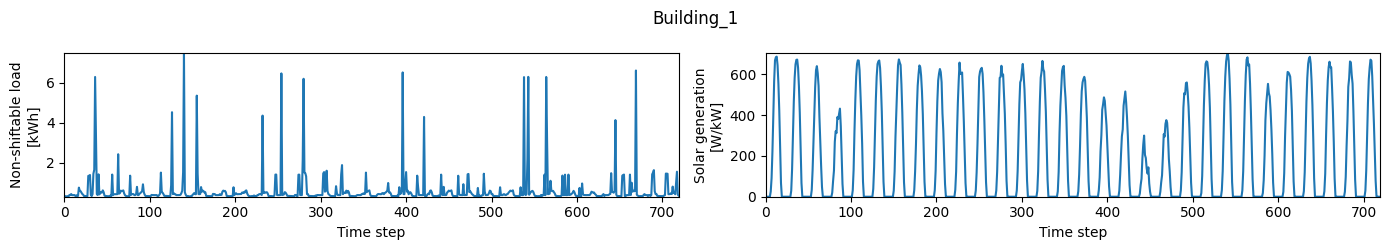

In [19]:
'''Plot non-shiftable load vs solar generation'''

fig, axs = plt.subplots(1, 2, figsize=(14, 2.5))
x = building_data.index
y1 = building_data['non_shiftable_load'] 
y2 = building_data['solar_generation']
axs[0].plot(x, y1)
axs[0].set_xlabel('Time step')
axs[0].set_ylabel('Non-shiftable load\n[kWh]')
axs[1].plot(x, y2)
axs[1].set_xlabel('Time step')
axs[1].set_ylabel('Solar generation\n[W/kW]')
fig.suptitle(selected_building)
plt.tight_layout()
plt.show()

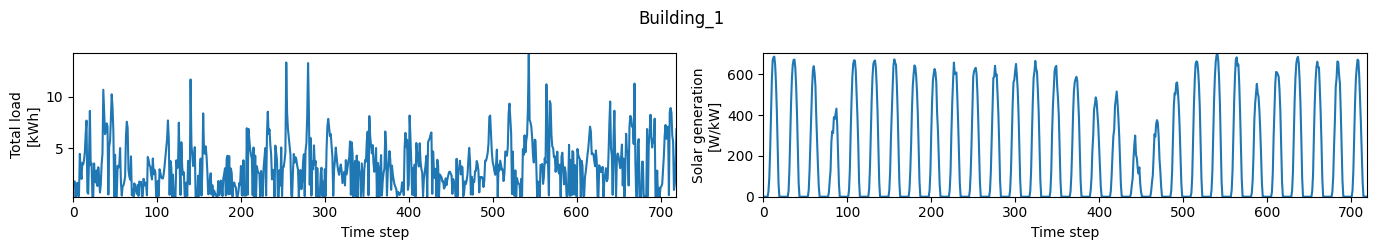

In [20]:
'''Plot total load vs solar generation'''

fig, axs = plt.subplots(1, 2, figsize=(14, 2.5))
x = building_data.index
y1 = building_data['non_shiftable_load'] + building_data["cooling_demand"]
y2 = building_data['solar_generation']
axs[0].plot(x, y1)
axs[0].set_xlabel('Time step')
axs[0].set_ylabel('Total load\n[kWh]')
axs[1].plot(x, y2)
axs[1].set_xlabel('Time step')
axs[1].set_ylabel('Solar generation\n[W/kW]')
fig.suptitle(selected_building)
plt.tight_layout()
plt.show()

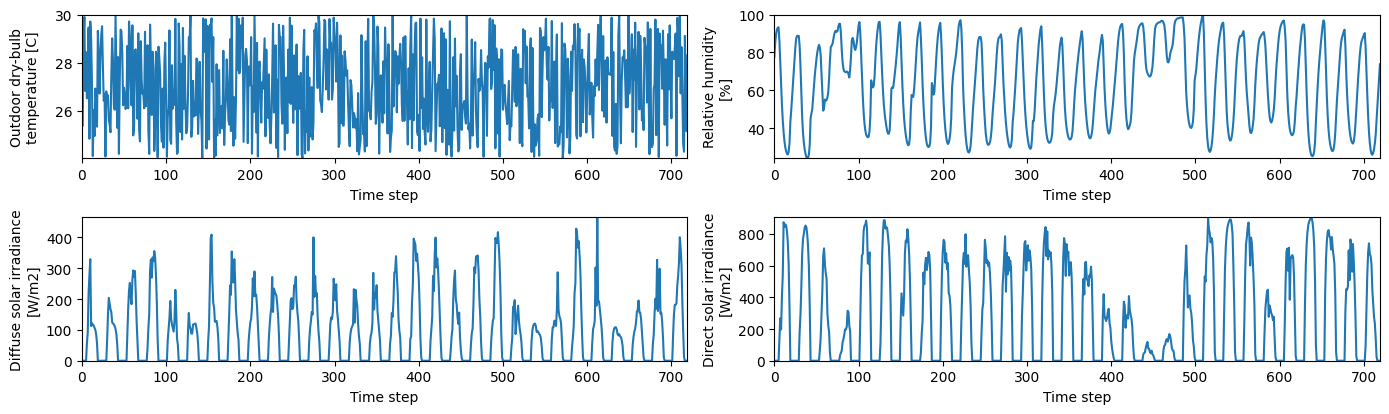

In [21]:
'''Plot weather data'''
columns = [
    'outdoor_dry_bulb_temperature', 'outdoor_relative_humidity',
    'diffuse_solar_irradiance', 'direct_solar_irradiance'
]
titles = [
    'Outdoor dry-bulb\ntemperature [C]', 'Relative humidity\n[%]',
    'Diffuse solar irradiance\n[W/m2]', 'Direct solar irradiance\n[W/m2]'
]
fig, axs = plt.subplots(2, 2, figsize=(14, 4.25))
x = weather_data.index

for ax, c, t in zip(fig.axes, columns, titles):
    y = weather_data[c]
    ax.plot(x, y)
    ax.set_xlabel('Time step')
    ax.set_ylabel(t)

fig.align_ylabels()
plt.tight_layout()
plt.show()

In [22]:
'''View carbon intensity data'''
filename = schema['buildings'][selected_building]['carbon_intensity']
filepath = os.path.join(root_directory, filename)
carbon_intensity_data = pd.read_csv(filepath)
display(carbon_intensity_data.head())
# carbon_intensity_data.info()

,carbon_intensity
0,0.402488
1,0.382625
2,0.369458
3,0.367017
4,0.374040


### Save changes to file


In [23]:
# filename = schema['buildings'][selected_building]['energy_simulation']
# filepath = os.path.join(root_directory, filename)
# building_data.to_csv(filepath, index=False)

In [24]:
filename = schema['buildings'][selected_building]['energy_simulation']
filepath = os.path.join(root_directory, filename)
building_data = pd.read_csv(filepath)
building_data.head(24)

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,occupant_count,indoor_dry_bulb_temperature_set_point,hvac_mode
0,6,1,5,0,26.570960,0.0,61.086185,0.356839,0.055682,1.119216,0.0,0.000000,3.0,25.0,3
1,6,2,5,0,27.823807,0.0,64.361380,0.345078,0.159338,1.469638,0.0,0.000000,3.0,25.0,3
2,6,3,5,0,27.955587,0.0,64.493416,0.338769,0.057004,1.458372,0.0,0.000000,3.0,25.0,3
3,6,4,5,0,26.174590,0.0,64.769700,0.334856,0.000000,0.000000,0.0,0.000000,3.0,25.0,3
4,6,5,5,0,29.572357,0.0,65.152120,0.348607,0.000000,1.163453,0.0,0.000000,3.0,25.0,3
5,6,6,5,0,29.126673,0.0,65.871284,0.346894,0.334834,1.335715,0.0,0.000000,3.0,25.0,3
6,6,7,5,0,24.342377,0.0,66.065575,0.408589,0.905819,0.000000,0.0,25.331348,2.0,25.0,3
7,6,8,5,0,28.967399,0.0,65.945410,0.402513,0.000000,0.000000,0.0,91.302536,2.0,25.0,3
8,6,9,5,0,29.434836,0.0,64.098340,0.452810,3.315016,4.025016,0.0,221.975020,2.0,25.0,3
9,6,10,5,0,28.704231,0.0,62.219505,0.400676,0.215396,2.458844,0.0,401.644070,1.0,25.0,3


### Graph stuff

In [25]:
def get_kpis(env: CityLearnEnv) -> pd.DataFrame:
    """Returns evaluation KPIs.

    Electricity cost and carbon emissions KPIs are provided
    at the building-level and average district-level. Average daily peak,
    ramping and (1 - load factor) KPIs are provided at the district level.

    Parameters
    ----------
    env: CityLearnEnv
        CityLearn environment instance.

    Returns
    -------
    kpis: pd.DataFrame
        KPI table.
    """

    kpis = env.unwrapped.evaluate(comfort_band=1)

    # names of KPIs to retrieve from evaluate function
    kpi_names = {
        'cost_total': 'Cost',
        'carbon_emissions_total': 'Emissions',
        'discomfort_proportion': 'Discomfort total',
        'discomfort_cold_proportion': 'Cold discomfort proportion',
        'discomfort_hot_proportion': 'Hot discomfort proportion',
        'daily_peak_average': 'Avg. daily peak',
        'ramping_average': 'Ramping',
        'monthly_one_minus_load_factor_average': '1 - load factor',
        'old_pricing_cost':'Old pricing system cost'
        
    }


    kpis = kpis[
        (kpis['cost_function'].isin(kpi_names))
    ].dropna()
    kpis['cost_function'] = kpis['cost_function'].map(lambda x: kpi_names[x])

    # round up the values to 2 decimal places for readability
    kpis['value'] = kpis['value'].round(2)

    # rename the column that defines the KPIs
    kpis = kpis.rename(columns={'cost_function': 'kpi'})


    return kpis

In [26]:
def plot_building_kpis(envs) -> plt.Figure:
    """Plots electricity consumption, cost and carbon emissions
    at the building-level for different control agents in bar charts.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    kpis_list = []

    for k, v in envs.items():
        kpis = get_kpis(v)
        kpis = kpis[kpis['level']=='building'].copy()
        kpis['building_id'] = kpis['name'].str.split('_', expand=True)[1]
        kpis['building_id'] = kpis['building_id'].astype(int).astype(str)
        kpis['env_id'] = k
        kpis_list.append(kpis)

    print(kpis_list)

    kpis = pd.concat(kpis_list, ignore_index=True, sort=False)
    kpi_names= kpis['kpi'].unique()
    column_count_limit = 2
    row_count = math.ceil(len(kpi_names)/column_count_limit)
    column_count = min(column_count_limit, len(kpi_names))
    building_count = len(kpis['name'].unique())
    env_count = len(envs)
    figsize = (3.5*column_count, 1*env_count*building_count*row_count)
    fig, _ = plt.subplots(
        row_count, column_count, figsize=figsize, sharey=True,
        gridspec_kw={'hspace': 3.5}


    )

    for i, (ax, (k, k_data)) in enumerate(zip(fig.axes, kpis.groupby('kpi'))):
        sns.barplot(x='value', y='name', data=k_data, hue='env_id', ax=ax)
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_title(k, verticalalignment =  'baseline')

        for j, _ in enumerate(envs):
            ax.bar_label(ax.containers[j], fmt='%.2f')

        if i == len(kpi_names) - 1:
           ax.legend(
            loc='upper left', bbox_to_anchor=(1.3, 1.0), framealpha=0.0
        )
        else:
            ax.legend().set_visible(False)

        for s in ['right','top']:
            ax.spines[s].set_visible(False)

    return fig

In [27]:
def plot_building_load_profiles(
    envs, daily_average: bool = None
) -> plt.Figure:
    """Plots building-level net electricty consumption profile
    for different control agents.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.
    daily_average: bool, default: False
        Whether to plot the daily average load profile.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    daily_average = False if daily_average is None else daily_average
    building_count = len(list(envs.values())[0].buildings)
    column_count_limit = 4
    row_count = math.ceil(building_count/column_count_limit)
    column_count = min(column_count_limit, building_count)
    figsize = (8.0*column_count, 3*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize)

    for i, ax in enumerate(fig.axes):
        for k, v in envs.items():
            y = v.unwrapped.buildings[i].net_electricity_consumption
            y = np.reshape(y, (-1, 24)).mean(axis=0) if daily_average else y
            x = range(len(y))
            ax.plot(x, y, label=k)

        ax.set_title(v.unwrapped.buildings[i].name)
        ax.set_ylabel('kWh')

        if daily_average:
            ax.set_xlabel('Hour')
            ax.xaxis.set_major_locator(ticker.MultipleLocator(2))

        else:
            ax.set_xlabel('Time step')
            ax.xaxis.set_major_locator(ticker.MultipleLocator(24))

        if i == building_count - 1:
            ax.legend(
                loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0
            )
        else:
            ax.legend().set_visible(False)


    plt.tight_layout()

    return fig


In [28]:
def plot_battery_soc_profiles(envs) -> plt.Figure:
    """Plots building-level battery SoC profiles fro different control agents.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.

    Returns
    -------
    fig: plt.Figure
        Figure containing plotted axes.
    """

    building_count = len(list(envs.values())[0].buildings)
    column_count_limit = 4
    row_count = math.ceil(building_count/column_count_limit)
    column_count = min(column_count_limit, building_count)
    figsize = (8.0*column_count, 3*row_count)
    fig, _ = plt.subplots(row_count, column_count, figsize=figsize)

    for i, ax in enumerate(fig.axes):
        for k, v in envs.items():
            y = np.array(v.unwrapped.buildings[i].electrical_storage.soc)
            x = range(len(y))
            ax.plot(x, y, label=k)

        ax.set_title(v.unwrapped.buildings[i].name)
        ax.set_xlabel('Time step')
        ax.set_ylabel('SoC')
        ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
        ax.set_ylim(0.0, 1.0)

        if i == building_count - 1:
            ax.legend(
                loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0
            )
        else:
            ax.legend().set_visible(False)


    plt.tight_layout()

    return fig

In [29]:
def plot_simulation_summary(envs):
    """Plots KPIs, load and battery SoC profiles for different control agents.

    Parameters
    ----------
    envs: dict[str, CityLearnEnv]
        Mapping of user-defined control agent names to environments
        the agents have been used to control.
    """

    print('#'*8 + ' BUILDING-LEVEL ' + '#'*8)
    print('Building-level KPIs:')
    _ = plot_building_kpis(envs)
    plt.show()

    print('Building-level simulation period load profiles:')
    _ = plot_building_load_profiles(envs)
    plt.show()

    print('Building-level daily-average load profiles:')
    _ = plot_building_load_profiles(envs, daily_average=True)
    plt.show()

    print('Battery SoC profiles:')
    _ = plot_battery_soc_profiles(envs)
    plt.show()



### Pre-model setup steps

In [30]:
'''Randomly select period of simulation'''
def select_simulation_period(
    dataset_name: str, count: int, seed: int, simulation_periods_to_exclude: List[Tuple[int, int]] = None) -> Tuple[int, int]:
    """Randomly select environment simulation start and end time steps
    that cover a specified number of days.

    Parameters
    ----------
    dataset_name: str
        CityLearn dataset to query buildings from.
    count: int
        Number of simulation days.
    seed: int
        Seed for pseudo-random number generator.
    simulation_periods_to_exclude: list[tuple[int, int]]
        List of simulation periods to exclude from selection pool.

    Returns
    -------
    simulation_start_time_step: int
        The first time step in schema time series files to
        be read when constructing the environment.
    simulation_end_time_step: int
        The last time step in schema time series files to
        be read when constructing the environment.
    """

    assert 1 <= count <= 365, 'count must be between 1 and 365.'

    # set random seed
    np.random.seed(seed)

    # use any of the files to determine the total
    # number of available time steps
    schema = DataSet.get_schema(dataset_name)
    filename = schema['buildings'][selected_building]['carbon_intensity']
    filepath = os.path.join(root_directory, filename)
    time_steps = pd.read_csv(filepath).shape[0]

    # set candidate simulation start time steps
    # spaced by the number of specified days
    simulation_start_time_step_list = np.arange(0, time_steps, 24*count)

    # exclude period if needed
    if simulation_periods_to_exclude is not None:
        simulation_start_time_step_list_to_exclude = \
            [s for s, e in simulation_periods_to_exclude]
        simulation_start_time_step_list = np.setdiff1d(
            simulation_start_time_step_list,
            simulation_start_time_step_list_to_exclude
        )

    else:
        pass

    # randomly select a simulation start time step
    simulation_start_time_step = np.random.choice(
        simulation_start_time_step_list, size=1
    )[0]
    simulation_end_time_step = simulation_start_time_step + 24*count - 1

    return simulation_start_time_step, simulation_end_time_step

In [31]:
random_seed = 7


In [32]:
'''Pick simulation time steps'''
simulation_start, simulation_end = select_simulation_period(DATASET_NAME, 30, random_seed)
simulation_start

0

average_unmet_cooling_setpoint_difference - Difference between indoor_dry_bulb_temperature and cooling temperature 

In [33]:
'''Pick observations and agent'''
# active_observations = ["hour", "indoor_dry_bulb_temperature", "electricity_pricing", "indoor_dry_bulb_temperature_delta", "non_shiftable_load", "average_unmet_cooling_setpoint_difference",]
active_observations = ["hour", "indoor_dry_bulb_temperature", "electricity_pricing", 
                       "non_shiftable_load", "solar_generation", "indoor_dry_bulb_temperature_set_point", 
                         ]



CENTRAL_AGENT = True

### Observation variables

In [ ]:
# {
#   "month": 6,
#   "hour": 2,
#   "day_type": 5,
#   "indoor_dry_bulb_temperature": 27.823807,
#   "non_shiftable_load": 0.34507817,
#   "dhw_demand": 0.15933841,
#   "cooling_demand": 1.4696382,
#   "heating_demand": 0,
#   "solar_generation": 0,
#   "daylight_savings_status": 0,
#   "average_unmet_cooling_setpoint_difference": 0,
#   "indoor_relative_humidity": 64.36138,
#   "occupant_count": 3,
#   "indoor_dry_bulb_temperature_set_point": 25,
#   "power_outage": 0,
#   "comfort_band": 2,
#   "indoor_dry_bulb_temperature_without_control": 27.823807,
#   "cooling_demand_without_control": 1.4696382,
#   "heating_demand_without_control": 0,
#   "dhw_demand_without_control": 0.15933841,
#   "non_shiftable_load_without_control": 0.34507817,
#   "indoor_relative_humidity_without_control": 64.36138,
#   "indoor_dry_bulb_temperature_set_point_without_control": 25,
#   "hvac_mode": 3,
#   "outdoor_dry_bulb_temperature": 29.26,
#   "outdoor_relative_humidity": 85.12,
#   "diffuse_solar_irradiance": 0,
#   "direct_solar_irradiance": 0,
#   "outdoor_dry_bulb_temperature_predicted_6h": 27.076563,
#   "outdoor_dry_bulb_temperature_predicted_12h": 38.31935,
#   "outdoor_dry_bulb_temperature_predicted_24h": 23.5155,
#   "outdoor_relative_humidity_predicted_6h": 87.31766,
#   "outdoor_relative_humidity_predicted_12h": 37.910023,
#   "outdoor_relative_humidity_predicted_24h": 95.35395,
#   "diffuse_solar_irradiance_predicted_6h": 78.37548,
#   "diffuse_solar_irradiance_predicted_12h": 89.220505,
#   "diffuse_solar_irradiance_predicted_24h": 0,
#   "direct_solar_irradiance_predicted_6h": 300.36105,
#   "direct_solar_irradiance_predicted_12h": 825.0973,
#   "direct_solar_irradiance_predicted_24h": 0,
#   "electricity_pricing": 0.02893,
#   "electricity_pricing_predicted_6h": 0.02915,
#   "electricity_pricing_predicted_12h": 0.02915,
#   "electricity_pricing_predicted_24h": 0.02893,
#   "carbon_intensity": 0.38262463,
#   "cooling_storage_soc": 0,
#   "heating_storage_soc": 0,
#   "dhw_storage_soc": 0,
#   "electrical_storage_soc": 0.19998,
#   "net_electricity_consumption": 0.953301,
#   "cooling_electricity_consumption": 0.43855977,
#   "heating_electricity_consumption": 0,
#   "dhw_electricity_consumption": 0.16966304,
#   "cooling_storage_electricity_consumption": 0,
#   "heating_storage_electricity_consumption": 0,
#   "dhw_storage_electricity_consumption": 0,
#   "electrical_storage_electricity_consumption": 0,
#   "cooling_device_efficiency": 3.35105562,
#   "heating_device_efficiency": 5.27710618,
#   "dhw_device_efficiency": 0.939146312056097,
#   "indoor_dry_bulb_temperature_delta": 2.8238068
# }

## Initialize environments

### Baseline Agent

In [35]:

baseline_env = CityLearnEnv(
    DATASET_NAME,
    central_agent=CENTRAL_AGENT,
    buildings=selected_building,
    active_observations=active_observations,
    simulation_start_time_step=simulation_start,
    simulation_end_time_step=simulation_end,
)

baseline_model = BaselineAgent(baseline_env)

# always start by reseting the environment
observations, _ = baseline_env.reset()

# step through the environment until terminal
# state is reached i.e., the control episode ends
while not baseline_env.terminated:
    # select actions from the model
    actions = baseline_model.predict(observations)

    # apply selected actions to the environment
    observations, _, _, _, _ = baseline_env.step(actions)

######## BUILDING-LEVEL ########
Building-level KPIs:
DRY BULB TEMP setpoint -  0      25.0
1      25.0
2      25.0
3      25.0
4      25.0
       ... 
715    25.0
716    25.0
717    25.0
718    25.0
719    25.0
Name: dry_bulb_temperature_set_point, Length: 720, dtype: float32
DRY BULB TEMP setpoint -  0      25.0
1      25.0
2      25.0
3      25.0
4      25.0
       ... 
715    25.0
716    25.0
717    25.0
718    25.0
719    25.0
Name: dry_bulb_temperature_set_point, Length: 720, dtype: float32
[                           kpi  value        name     level building_id  \
23                   Emissions   1.00  Building_1  building           1   
24                        Cost   1.00  Building_1  building           1   
25            Discomfort total   0.84  Building_1  building           1   
26  Cold discomfort proportion   0.78  Building_1  building           1   
27   Hot discomfort proportion   0.06  Building_1  building           1   

      env_id  
23  Baseline  
24  Baseline  
2

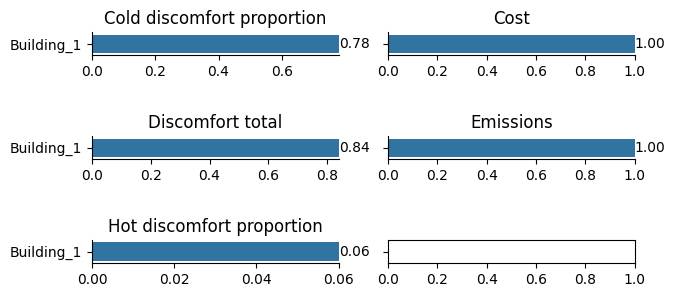

Building-level simulation period load profiles:


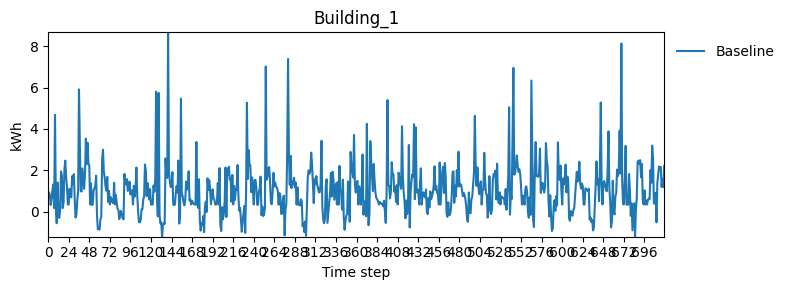

Building-level daily-average load profiles:


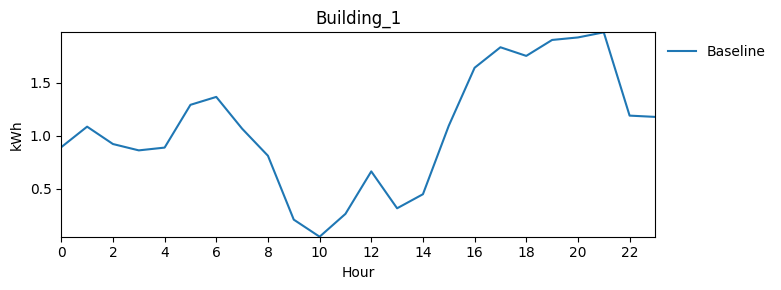

Battery SoC profiles:


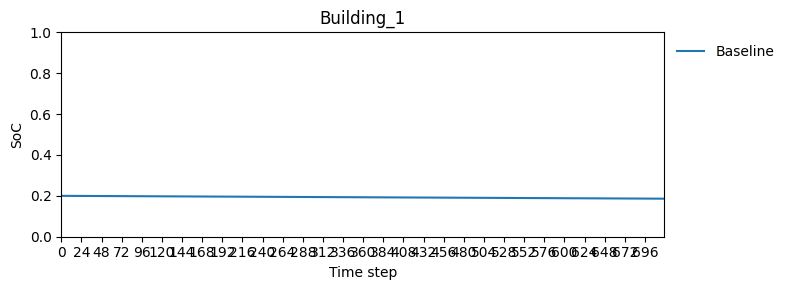

In [36]:
plot_simulation_summary({
    'Baseline': baseline_env,
})

### SAC controller 

100%|██████████| 15/15 [21:16<00:00, 85.10s/it]


######## BUILDING-LEVEL ########
Building-level KPIs:
DRY BULB TEMP setpoint -  0      25.0
1      25.0
2      25.0
3      25.0
4      25.0
       ... 
715    25.0
716    25.0
717    25.0
718    25.0
719    25.0
Name: dry_bulb_temperature_set_point, Length: 720, dtype: float32
DRY BULB TEMP setpoint -  0      25.0
1      25.0
2      25.0
3      25.0
4      25.0
       ... 
715    25.0
716    25.0
717    25.0
718    25.0
719    25.0
Name: dry_bulb_temperature_set_point, Length: 720, dtype: float32
DRY BULB TEMP setpoint -  0      25.0
1      25.0
2      25.0
3      25.0
4      25.0
       ... 
715    25.0
716    25.0
717    25.0
718    25.0
719    25.0
Name: dry_bulb_temperature_set_point, Length: 720, dtype: float32
DRY BULB TEMP setpoint -  0      25.0
1      25.0
2      25.0
3      25.0
4      25.0
       ... 
715    25.0
716    25.0
717    25.0
718    25.0
719    25.0
Name: dry_bulb_temperature_set_point, Length: 720, dtype: float32
[                           kpi  value        name

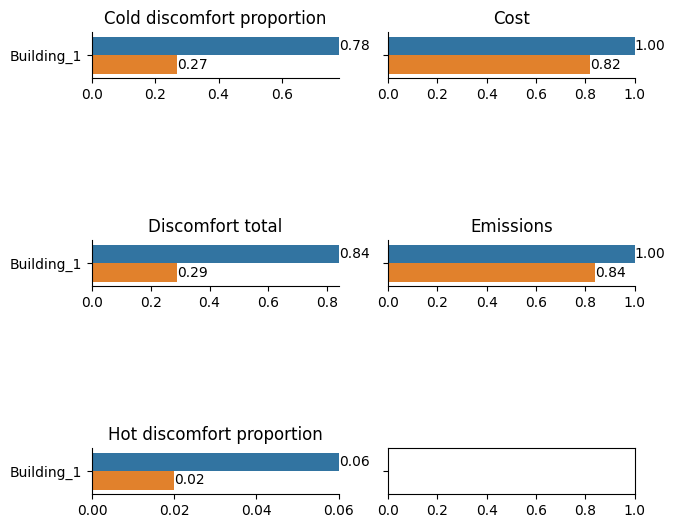

Building-level simulation period load profiles:


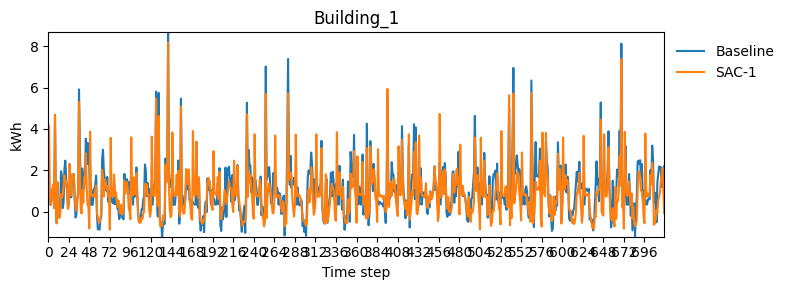

Building-level daily-average load profiles:


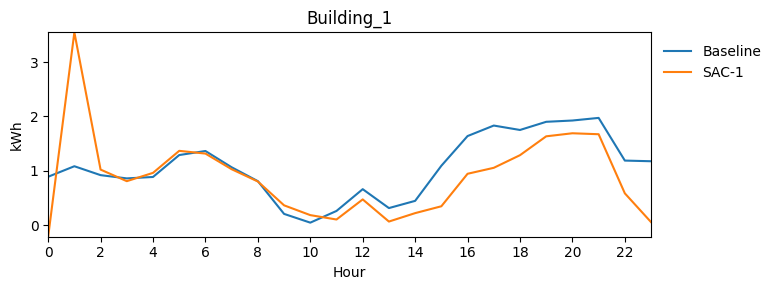

Battery SoC profiles:


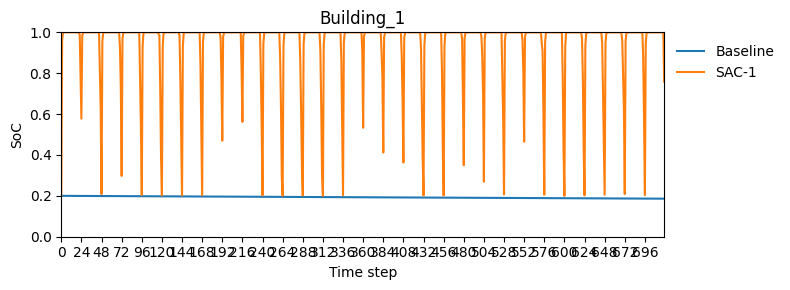

In [37]:
from citylearn.reward_function import SolarPenaltyAndComfortReward

sac_env = CityLearnEnv(
    DATASET_NAME,
    central_agent=CENTRAL_AGENT,
    buildings=selected_building,
    active_observations=active_observations,
    simulation_start_time_step=simulation_start,
    simulation_end_time_step=simulation_end,
)

sac_env = StableBaselines3Wrapper(sac_env)

sac_model = SAC(policy='MlpPolicy', env=sac_env, seed=random_seed)

sac_episodes = 15
sac_episode_timesteps = sac_env.unwrapped.time_steps - 1
sac_total_timesteps = sac_episodes*sac_episode_timesteps

# ------------------------------- TRAIN MODEL -----------------------------
for i in tqdm(range(sac_episodes)):
    sac_model = sac_model.learn(
        total_timesteps=sac_episode_timesteps,
        reset_num_timesteps=False,
    )

observations, _ = sac_env.reset()
sac_actions_list = []

while not sac_env.unwrapped.terminated:
    actions, _ = sac_model.predict(observations, deterministic=True)
    observations, _, _, _, _ = sac_env.step(actions)
    sac_actions_list.append(actions)

# plot summary and compare with other control results
plot_simulation_summary({
    'Baseline': baseline_env,
    'SAC-1': sac_env
})


### Save the model

In [52]:
sac_model.save("Initial_model_reward_3")


### Insights from the model


In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker

def plot_actions(actions_list, building_names, title):
    """Plots action time series for different buildings

    Parameters
    ----------
    actions_list: list[list[float]]
        List of actions where each element with index, i,
        in list is a list of the actions for different buildings
        taken at time step i.
    building_names: list[str]:
        List of build names that map to the action lists.
    title: str
        Plot axes title

    Returns
    -------
    fig: plt.Figure
        Figure with plotted axes
    """

    fig, ax = plt.subplots(1, 1, figsize=(6, 1))
    plot_data = pd.DataFrame(actions_list, columns=building_names)
    x = list(range(plot_data.shape[0]))

    for c in plot_data.columns:
        y = plot_data[c].tolist()
        ax.plot(x, y, label=c)

    ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), framealpha=0.0)
    ax.set_xlabel('Time step')
    ax.set_ylabel(r'$\frac{kWh}{kWh_{capacity}}$')

    # Increase granularity of y-axis
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2f}'.format(x)))
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator(0.2))

    ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
    ax.set_title(title)

    return fig


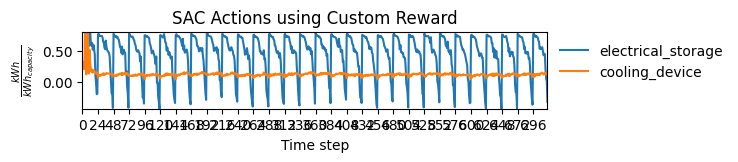

In [40]:
fig = plot_actions(sac_actions_list, [ "electrical_storage", "cooling_device"], 'SAC Actions using Custom Reward')
plt.show()

In [41]:
sac_actions_list
len(sac_actions_list)

719

In [42]:
def plot_rewards(ax, rewards, title: str) -> plt.Axes:
    """Plots rewards over training episodes.

    Parameters
    ----------
    rewards: list[float]
        List of reward sum per episode.
    title: str
        Plot axes title

    Returns
    -------
    ax: plt.Axes
        Plotted axes
    """

    ax.plot(rewards)
    ax.set_xlabel('Episode')
    ax.set_ylabel('Reward')
    ax.set_title(title)

    return ax

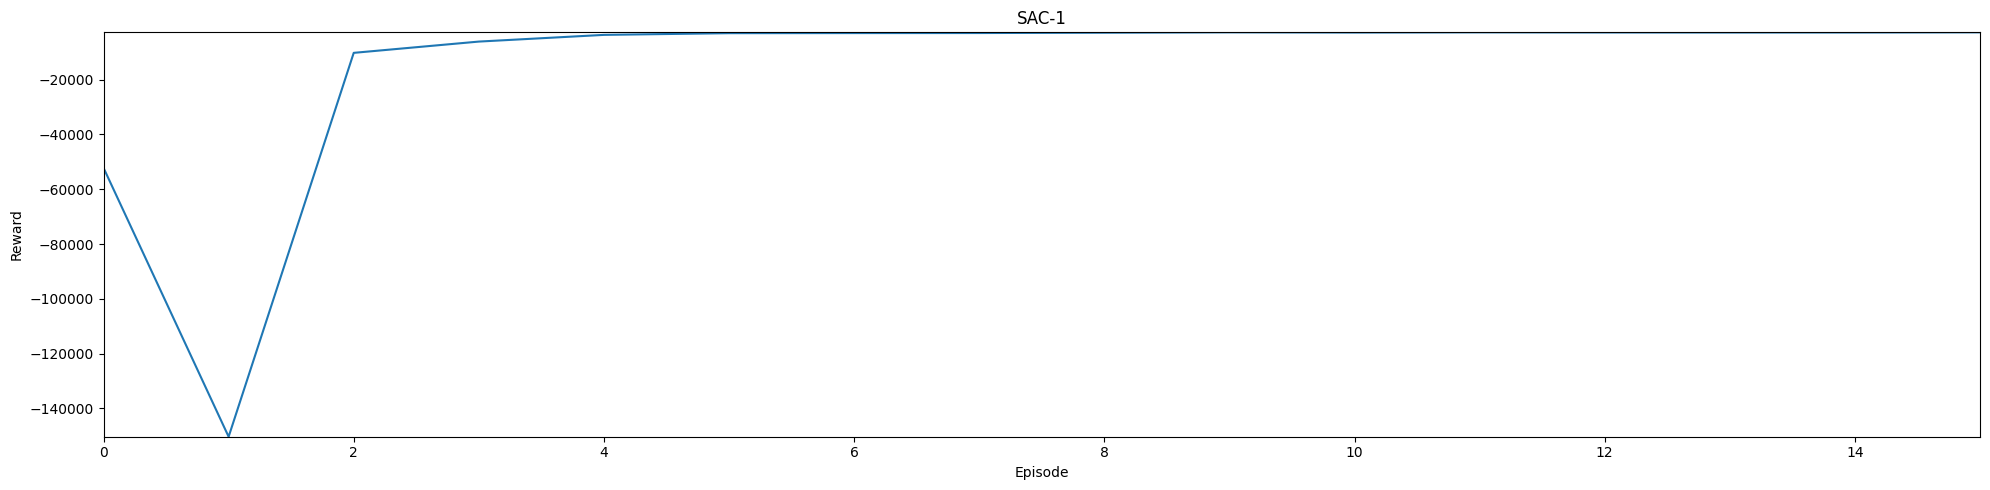

In [53]:
envs = {
    'SAC-1': pd.DataFrame(sac_env.unwrapped.episode_rewards)['sum'].tolist(),
}
fig, axs = plt.subplots(1, figsize=(20, 5))

for ax, (k, v) in zip(fig.axes, envs.items()):
    ax = plot_rewards(ax, v, k)

plt.tight_layout()
plt.show()

In [44]:
help(sac_env.unwrapped.reward_function)

Help on SolarPenaltyAndComfortReward in module citylearn.reward_function object:

class SolarPenaltyAndComfortReward(RewardFunction)
 |  SolarPenaltyAndComfortReward(env_metadata: Mapping[str, Any], band: float = None, lower_exponent: float = None, higher_exponent: float = None, coefficients: Tuple = None)
 |  
 |  Addition of :py:class:`citylearn.reward_function.SolarPenaltyReward` and :py:class:`citylearn.reward_function.ComfortReward`.
 |  
 |  Parameters
 |  ----------
 |  env_metadata: Mapping[str, Any]:
 |      General static information about the environment.
 |  band: float, default = 2.0
 |      Setpoint comfort band (+/-). If not provided, the comfort band time series defined in the
 |      building file, or the default time series value of 2.0 is used.
 |  lower_exponent: float, default = 2.0
 |      Penalty exponent for when in cooling mode but temperature is above setpoint upper
 |      boundary or heating mode but temperature is below setpoint lower boundary.
 |  higher_e

### Tuned SAC controller

In [45]:
# class CustomReward(RewardFunction):
#     def __init__(self, env_metadata):
#         r"""Initialize CustomReward.

#         Parameters
#         ----------
#         env_metadata: dict[str, Any]:
#             General static information about the environment.
#         """

#         super().__init__(env_metadata)

#     def calculate(
#         self, observations
#     ):
#         r"""Returns reward for most recent action.

#         The reward is designed to minimize electricity cost.
#         It is calculated for each building, i and summed to provide the agent
#         with a reward that is representative of all n buildings.
#         It encourages net-zero energy use by penalizing grid load satisfaction
#         when there is energy in the battery as well as penalizing
#         net export when the battery is not fully charged through the penalty
#         term. There is neither penalty nor reward when the battery
#         is fully charged during net export to the grid. Whereas, when the
#         battery is charged to capacity and there is net import from the
#         grid the penalty is maximized.

#         Parameters
#         ----------
#         observations: list[dict[str, int | float]]
#             List of all building observations at current
#             :py:attr:`citylearn.citylearn.CityLearnEnv.time_step`
#             that are got from calling
#             :py:meth:`citylearn.building.Building.observations`.

#         Returns
#         -------
#         reward: list[float]
#             Reward for transition to current timestep.
#         """

#         reward_list = []

#         for o, m in zip(observations, self.env_metadata['buildings']):
#             cost = o['net_electricity_consumption']*o['electricity_pricing']
#             battery_soc = o['electrical_storage_soc']
#             penalty = -(1.0 + np.sign(cost)*battery_soc)
#             reward = penalty*abs(cost)
#             reward_list.append(reward)

#         reward = [sum(reward_list)]

#         return reward

In [46]:
# sacr_env = CityLearnEnv(
#     DATASET_NAME,
#     central_agent=CENTRAL_AGENT,
#     buildings=selected_building,
#     active_observations=active_observations,
#     simulation_start_time_step=simulation_start,
#     simulation_end_time_step=simulation_end,
# )
# # sacr_env = NormalizedObservationWrapper(sacr_env)
# sacr_env = StableBaselines3Wrapper(sacr_env)
# sacr_model = SAC(policy='MlpPolicy', env=sacr_env, seed=random_seed)

# for i in tqdm(range(sac_episodes)):
#     sacr_model = sacr_model.learn(
#         total_timesteps=sac_episode_timesteps,
#         reset_num_timesteps=False,
#     )

In [47]:
# observations, _ = sacr_env.reset()
# sacr_actions_list = []

# while not sacr_env.unwrapped.terminated:
#     actions, _ = sacr_model.predict(observations, deterministic=True)
#     observations, _, _, _, _ = sacr_env.step(actions)
#     sacr_actions_list.append(actions)

# plot_simulation_summary({
#     'Baseline': baseline_env,
#     # Uncomment line below if you have completed Exercise 1
#     # 'Random': random_env,
#     'SAC-1': sac_env,
#     'SAC-2': sacr_env
# })

In [48]:
# envs = {
#     'SAC-1': pd.DataFrame(sac_env.unwrapped.episode_rewards)['sum'].tolist(),
#     'SAC-2': pd.DataFrame(sacr_env.unwrapped.episode_rewards)['sum'].tolist()
# }
# fig, axs = plt.subplots(1, 2, figsize=(12, 2))

# for ax, (k, v) in zip(fig.axes, envs.items()):
#     ax = plot_rewards(ax, v, k)

# plt.tight_layout()
# plt.show()

In [49]:
# fig = plot_actions(sacr_actions_list, ["electrical_storage", "cooling_device"], 'SAC Actions using Custom Reward')
# plt.show()

In [50]:
# help(sacr_env.unwrapped.reward_function)

### Rule-Based controller

In [51]:
# # define action map
# action_map = {
#     1: 0.0,
#     2: 0.0,
#     3: 0.0,
#     4: 0.0,
#     5: 0.0,
#     6: 0.0,
#     7: 0.0,
#     8: 0.10,
#     9: 0.10,
#     10: 0.10,
#     11: 0.10,
#     12: 0.10,
#     13: 0.15,
#     14: 0.15,
#     15: 0.15,
#     16: 0.05,
#     17: 0.0,
#     18: -0.10,
#     19: -0.20,
#     20: -0.20,
#     21: -0.10,
#     22: -0.10,
#     23: -0.10,
#     24: -0.10,
# }

# # run inference
# rbc_env = CityLearnEnv(
#     DATASET_NAME,
#     central_agent=CENTRAL_AGENT,
#     buildings=selected_building,
#     active_observations= active_observations,
#     simulation_start_time_step= simulation_start,
#     simulation_end_time_step= simulation_end,
# )
# rbc_model = HourRBC(rbc_env, action_map=action_map)
# observations, _ = rbc_env.reset()

# while not rbc_env.terminated:
#     actions = rbc_model.predict(observations)
#     observations, _, _, _, _ = rbc_env.step(actions)

# # display simulation summary
# plot_simulation_summary({
#     'Baseline': baseline_env,
#     # Uncomment line below if you have completed Exercise 1
#     # 'Random': random_env,
#     'RBC': rbc_env,
# })